# dftscaleproperty - Illustrate the scale property of the Discrete Fourier Transform.

The scale property of the Discrete Fourier Transform (DFT) is not the same as in the continuous Fourier Transform. In the discrete case the property is the following. If the image is enlarged in such a way that the new pixels have value zero, then its DFT is filled with a replication of the original DFT. In this demonstration, a small original image is expanded and its DFT is compared to the replicated DFT of the original image. The results should be the same.

http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iadftscaleproperty/view/

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_6/')
if path not in sys.path:
    sys.path.append(path)
import ptrans as ptr

In [2]:
def dftscaleproperty(froi,scale):
    Froi = np.fft.fft2(froi) # F is the DFT of f
    r,c = froi.shape
    
    froix = np.zeros(scale*np.array(froi.shape)) # size is 4 times larger
    froix[::scale,::scale] = froi
    Froix = np.fft.fft2(froix) # Fx4 is the DFT of fx4 (expanded f)
    r2,c2 = froix.shape
    
    plt.figure(1,figsize=(2,2))
    plt.subplot(121)
    plt.imshow(froi, cmap="gray")
    plt.title('froi')
    plt.subplot(122)
    plt.imshow(np.log(np.abs(ptr.ptransfat(Froi,(r//2,c//2)))+1),cmap='gray')
    plt.title('Froi')
    
    plt.figure(2,figsize=(2*scale,2*scale))
    plt.subplot(121)
    plt.imshow(froix, cmap="gray")
    plt.title('froix{}'.format(scale))
    plt.subplot(122)
    plt.imshow(np.log(np.abs(ptr.ptransfat(Froix,(r2//2,c2//2)))+1),cmap='gray')
    plt.title('Froix{}'.format(scale))
    

In [3]:
testing = (__name__ == '__main__')

if testing:
    import sys,os
    ! jupyter nbconvert --to 'python' dftscaleproperty

    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_7/')
    if path not in sys.path:
        sys.path.append(path)
    import dftscaleproperty as dftsp

[NbConvertApp] Converting notebook dftscaleproperty.ipynb to python
[NbConvertApp] Writing 5318 bytes to dftscaleproperty.py


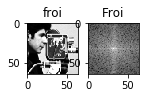

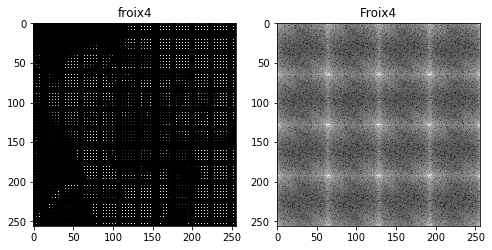

In [4]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    froi = f[19:19+64,99:99+64] # ROI selection
    dftsp.dftscaleproperty(froi,4)

The image is read and a small portion (64x64) is selected.

f.shape:
 (256, 256)
froi.shape:
 (64, 64)


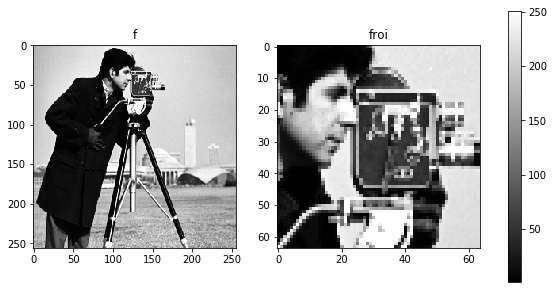

In [5]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    froi = f[19:19+64,99:99+64] # ROI selection
    print('f.shape:\n', f.shape)
    print('froi.shape:\n', froi.shape)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].set_title('f')
    axes[1].set_title('froi')
    im = axes[0].imshow(f, cmap="gray")
    im = axes[1].imshow(froi,cmap='gray')    
    fig.colorbar(im, ax=axes.ravel().tolist())

The DFT of the ROI image is taken and its spectrum is displayed

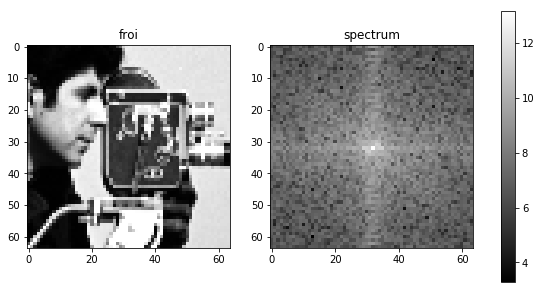

In [6]:
if testing:
    F = np.fft.fft2(froi) # F is the DFT of f
    r,c = froi.shape

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].set_title('froi')
    axes[1].set_title('spectrum')
    im = axes[0].imshow(froi, cmap="gray")
    im = axes[1].imshow(np.log(np.abs(ptr.ptransfat(F,(r//2,c//2)))+1),cmap='gray')
    fig.colorbar(im, ax=axes.ravel().tolist())


The image is expanded by 4, but filling the new pixels with 0

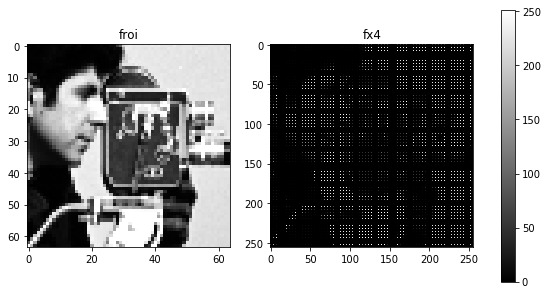

In [7]:
if testing:
    fx4 = np.zeros(4*np.array(froi.shape)) # size is 4 times larger
    fx4[::4,::4] = froi                    # filling the expanded image

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].set_title('froi')
    axes[1].set_title('fx4')
    im = axes[0].imshow(froi, cmap="gray")
    im = axes[1].imshow(fx4,cmap='gray')    
    fig.colorbar(im, ax=axes.ravel().tolist())

the resulting DFT is a periodical replication of the original DFT.

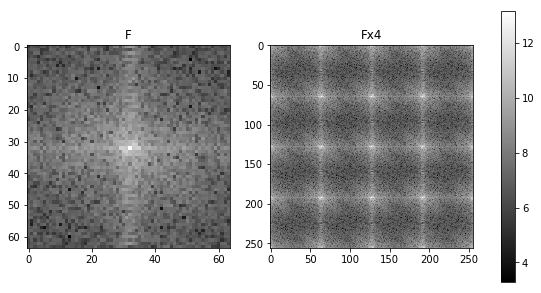

In [8]:
if testing:
    Fx4 = np.fft.fft2(fx4) # Fx4 is the DFT of fx4 (expanded f)
    r2,c2 = fx4.shape

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].set_title('F')
    axes[1].set_title('Fx4')
    im = axes[0].imshow(np.log(np.abs(ptr.ptransfat(F,(r//2,c//2)))+1),cmap='gray')
    im = axes[1].imshow(np.log(np.abs(ptr.ptransfat(Fx4,(r2//2,c2//2)))+1),cmap='gray')    
    fig.colorbar(im, ax=axes.ravel().tolist())

Alternatively, the original DFT (F) is replicated by 4 in each direction and compared with the DFT of the expanded image. For quantitative comparison, both the sum of the absolute errors of all pixels is computed and displayed.

FFx4-Fx4:  0.0
ffx4-fx4:  0.0


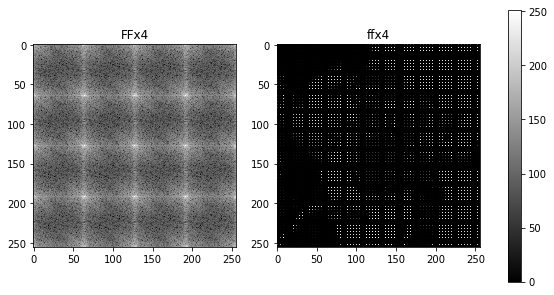

In [9]:
if testing:
    aux = np.concatenate((F,F,F,F))
    FFx4 = np.concatenate((aux,aux,aux,aux), 1) # replicate the DFT of f
    r3,c3 = FFx4.shape
    ffx4 = np.rint(np.abs(np.fft.ifft2(FFx4)))
    
    diff = abs(FFx4 - Fx4).sum()                 # compare the replicated DFT with DFT of expanded f
    print('FFx4-Fx4: ',diff)                                   # print the error signal power

    error = abs(fx4 - ffx4).sum()
    print ('ffx4-fx4: ', error)

    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].set_title('FFx4')
    axes[1].set_title('ffx4')
    im = axes[0].imshow(np.log(np.abs(ptr.ptransfat(FFx4,(r3//2,c3//2))+1)),cmap='gray')
    im = axes[1].imshow(ffx4,cmap='gray')    
    fig.colorbar(im, ax=axes.ravel().tolist())